# IGC File Test
[Aerofiles Docs](http://aerofiles.readthedocs.org/)

In [76]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import aerofiles.igc as igc
import datetime as dt

In [77]:
tz = dt.timezone(dt.timedelta(hours=-7), name='PDT')

In [78]:
igcfile = 'igc/Greg Sadowy.45.2.igc'
timezone = 'US/Pacific'

In [79]:
with open(igcfile, 'r') as f:
    igcdata = igc.Reader().read(f)

In [91]:
df = pd.DataFrame(igcdata['fix_records'][1])
df.set_index(
    df.time.apply(lambda t: dt.datetime.combine(igcdata['header'][1]['utc_date'], t, dt.timezone.utc)).dt.tz_convert(timezone),
    inplace=True)
df = df.reindex(columns = ['lat', 'lon', 'gps_alt', 'pressure_alt', 'validity'])
df[5000:5010]

,lat,lon,gps_alt,pressure_alt,validity
time,,,,,
2019-05-04 10:04:13-07:00,34.211933,-117.314600,1107,1067,A
2019-05-04 10:04:14-07:00,34.211950,-117.314600,1107,1067,A
2019-05-04 10:04:15-07:00,34.211967,-117.314583,1108,1067,A
2019-05-04 10:04:16-07:00,34.211967,-117.314583,1110,1067,A
2019-05-04 10:04:17-07:00,34.211967,-117.314583,1106,1068,A
2019-05-04 10:04:18-07:00,34.211983,-117.314583,1106,1068,A
2019-05-04 10:04:19-07:00,34.212000,-117.314567,1110,1068,A
2019-05-04 10:04:20-07:00,34.212000,-117.314567,1110,1068,A
2019-05-04 10:04:21-07:00,34.212017,-117.314550,1108,1068,A


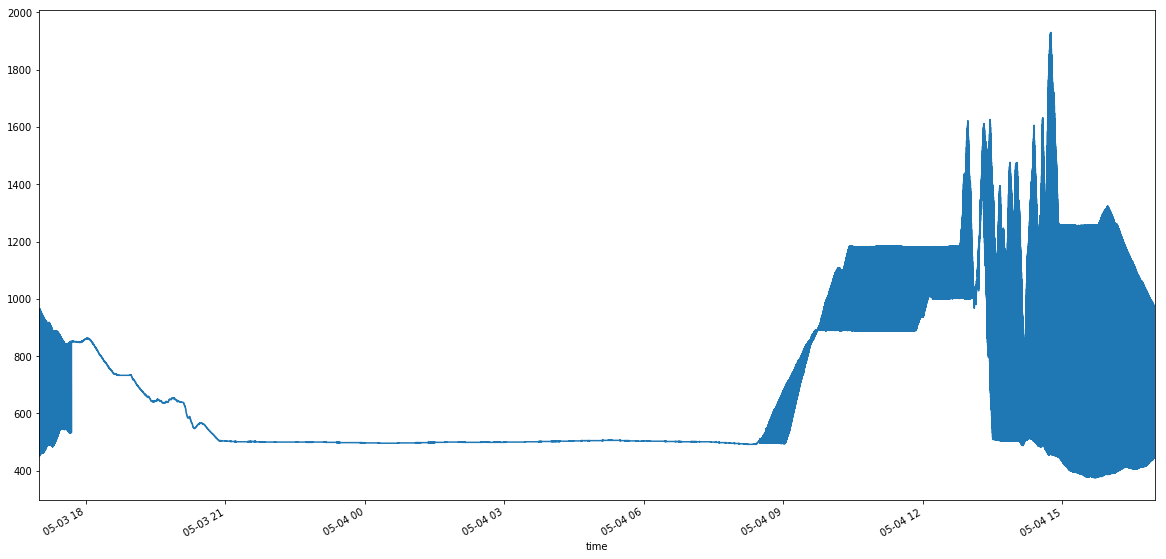

In [84]:
plt.figure(figsize=(20,10))
#df.gps_alt.plot()
df.pressure_alt.plot()

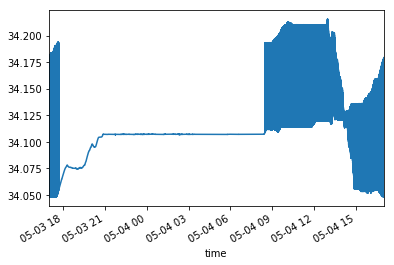

In [82]:
df.lat.plot()

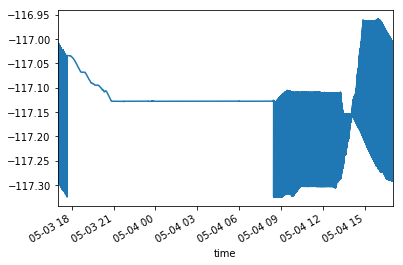

In [83]:
df.lon.plot()